In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.svm import LinearSVR

In [3]:
filepath = 'Datasets/Kaggle Cleaned/Life Expectancy Kaggle.csv'
df = pd.read_csv(filepath)
df.head(5)


,Country,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2000,54.8,321.0,88,0.01,10.424960,62.0,6532,12.2,122,24.0,8.20,24.0,0.1,2.3,2.5,0.338,5.5
1,Afghanistan,2001,55.3,316.0,88,0.01,10.574728,63.0,8762,12.6,122,35.0,7.80,33.0,0.1,2.1,2.4,0.340,5.9
2,Afghanistan,2002,56.2,3.0,88,0.01,16.887351,64.0,2486,13.0,122,36.0,7.76,36.0,0.1,19.9,2.2,0.341,6.2
3,Afghanistan,2003,56.7,295.0,87,0.01,11.089053,65.0,798,13.4,122,41.0,8.82,41.0,0.1,19.7,19.9,0.373,6.5
4,Afghanistan,2004,57.0,293.0,87,0.02,15.296066,67.0,466,13.8,120,5.0,8.79,5.0,0.1,19.5,19.7,0.381,6.8


In [4]:
df.shape

(2445, 19)

In [5]:
df.describe()

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000,2445.000000
mean,2007.000000,68.795051,166.644581,31.062577,4.309732,666.401535,75.975869,2309.798364,37.669816,43.021677,82.087117,5.769072,81.998364,1.917055,5.084172,5.129407,0.614865,11.815174
std,4.321378,9.260263,125.082974,125.767801,3.937997,1683.994068,28.413085,10974.310775,19.778206,171.249328,23.469941,2.307287,23.702742,5.482181,4.531485,4.620961,0.207476,3.162035
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,76.000000,0.000000,0.680000,16.754809,67.000000,0.000000,18.800000,0.000000,77.000000,4.240000,78.000000,0.100000,1.700000,1.700000,0.487000,10.000000
50%,2007.000000,71.800000,146.000000,3.000000,3.410000,90.761444,89.000000,16.000000,42.700000,4.000000,92.000000,5.620000,92.000000,0.100000,3.500000,3.500000,0.666000,12.200000
75%,2011.000000,75.000000,227.000000,20.000000,7.170000,471.830767,96.000000,353.000000,55.500000,25.000000,97.000000,7.200000,97.000000,0.900000,7.400000,7.400000,0.760000,13.900000
max,2014.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.000000,212183.000000,77.100000,2500.000000,99.000000,14.390000,99.000000,50.600000,27.700000,28.600000,0.936000,20.700000


In [6]:
X = df.drop(['Year', 'Country', 'Life expectancy'], axis=1)  # Features
y = df['Life expectancy'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [8]:

for i in ['linear','poly','rbf']:
    ker = SVR(kernel = i, gamma = 'auto')
    ker.fit(X_train, y_train)
    ker_train= ker.score(X_train,y_train)
    ker_test = ker.score(X_test, y_test)
    print('For the', i,'kernel, the train score is: {:.4f}'.format(ker_train))
    print('For the', i,'kernel, the test score is: {:.4f}'.format(ker_test))
    print('\n')

For the linear kernel, the train score is: 0.8038
For the linear kernel, the test score is: 0.8342


For the poly kernel, the train score is: 0.7621
For the poly kernel, the test score is: 0.7405


For the rbf kernel, the train score is: 0.8704
For the rbf kernel, the test score is: 0.8555




# SVR with Kernel Linear

In [9]:

#We are considering only the two main parameters- C and gamma
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 0.5, 1.0, 2.0]}
print("Parameter grid:\n{}".format(param_grid))

grid_ker_lin = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv = 5, return_train_score=True)
grid_ker_lin.fit(X_train,y_train)

print("Best parameters for kernel SVR linear: {}".format(grid_ker_lin.best_params_))
print("Best cross-validationscore: {:.2f}".format(grid_ker_lin.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1.0, 2.0]}
Best parameters for kernel SVR linear: {'C': 100, 'epsilon': 2.0, 'gamma': 0.001}
Best cross-validationscore: 0.80


In [11]:
best_kerlinsvr = SVR( kernel = 'linear', C=100, gamma=0.001, epsilon=2.0)
best_kerlinsvr.fit(X_train, y_train)
ykerlinsvr_predicted = best_kerlinsvr.predict(X_test)

print('Train score: {:.4f}'.format(best_kerlinsvr.score(X_train, y_train)))
print('Test score: {:.4f}'.format(best_kerlinsvr.score(X_test, y_test)))
print('R2_score: {:.4f}'.format(r2_score(y_test,ykerlinsvr_predicted)))
MSE = np.square(np.subtract(y_test,ykerlinsvr_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))
RMSE = np.sqrt(mean_squared_error(y_test, ykerlinsvr_predicted))
print('RMSE: {:.4f}'.format(RMSE))

Train score: 0.8075
Test score: 0.8330
R2_score: 0.8330
MSE: 14.8774
RMSE: 3.8571


# SVR with Kernel Poly (impossible to run this model)

In [ ]:
# #We are considering only the two main parameters- C and gamma
# grid_ker_poly = GridSearchCV(SVR(kernel = 'poly'), param_grid, cv = 5, return_train_score=True)
# grid_ker_poly.fit(X_train,y_train)

# print("Best parameters for kernel SVR poly: {}".format(grid_ker_poly.best_params_))
# print("Best cross-validationscore: {:.2f}".format(grid_ker_poly.best_score_))
# print('Train score: {:.4f}'.format(grid_ker_poly.score(X_train, y_train)))
# print('Test score: {:.4f}'.format(grid_ker_poly.score(X_test, y_test)))

# SVR with Kernel RBF

In [13]:
#We are considering only the two main parameters- C and gamma
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 0.5, 1.0, 2.0]}

grid_ker_rbf = GridSearchCV(SVR(kernel = 'rbf'), param_grid, cv = 7, return_train_score=True)
grid_ker_rbf.fit(X_train,y_train)

print("Best parameters for kernel rbf: {}".format(grid_ker_rbf.best_params_))
print("Best cross-validationscore: {:.2f}".format(grid_ker_rbf.best_score_))
print('Train score: {:.4f}'.format(grid_ker_rbf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(grid_ker_rbf.score(X_test, y_test)))

Best parameters for kernel rbf poly: {'C': 100, 'epsilon': 0.1, 'gamma': 0.01}
Best cross-validationscore: 0.92
Train score: 0.9354
Test score: 0.9245


In [17]:
best_kerrbfsvr = SVR( kernel = 'rbf', C=100, gamma=0.01, epsilon=0.1)
best_kerrbfsvr.fit(X_train, y_train)
ykerrbfsvr_predicted = best_kerrbfsvr.predict(X_test)

print('R2_score: {:.4f}'.format(r2_score(y_test,ykerrbfsvr_predicted)))
MSE = np.square(np.subtract(y_test,ykerrbfsvr_predicted)).mean()
print('MSE: {:.4f}'.format(MSE))
RMSE = np.sqrt(mean_squared_error(y_test, ykerlinsvr_predicted))
print('RMSE: {:.4f}'.format(RMSE))

R2_score: 0.9245
MSE: 6.7222
RMSE: 2.5927


In [14]:
from sklearn.model_selection import cross_val_score


# Khởi tạo mô hình SVR
svr = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.01)

# Sử dụng cross-validation với 5 folds
scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Chuyển đổi từ MSE sang RMSE và tính trung bình
rmse_scores = np.sqrt(-scores)
mean_rmse = np.mean(rmse_scores)

print("Cross-Validation RMSE scores:", rmse_scores)
print("Mean RMSE:", mean_rmse)


Cross-Validation RMSE scores: [2.56648825 2.44705423 2.58282039 2.62082598 2.65447085]
Mean RMSE: 2.5743319420775403


In [16]:
# Khởi tạo mô hình SVR
svr = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.01)

# Sử dụng cross-validation với 5 folds để tính R² scores
r2_scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='r2')

# Tính trung bình và độ lệch chuẩn của R² scores
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print("Cross-Validation R² scores:", r2_scores)
print("Mean R² score:", mean_r2)


Cross-Validation R² scores: [0.91907555 0.92684608 0.92209247 0.92571717 0.91418844]
Mean R² score: 0.9215839415105778


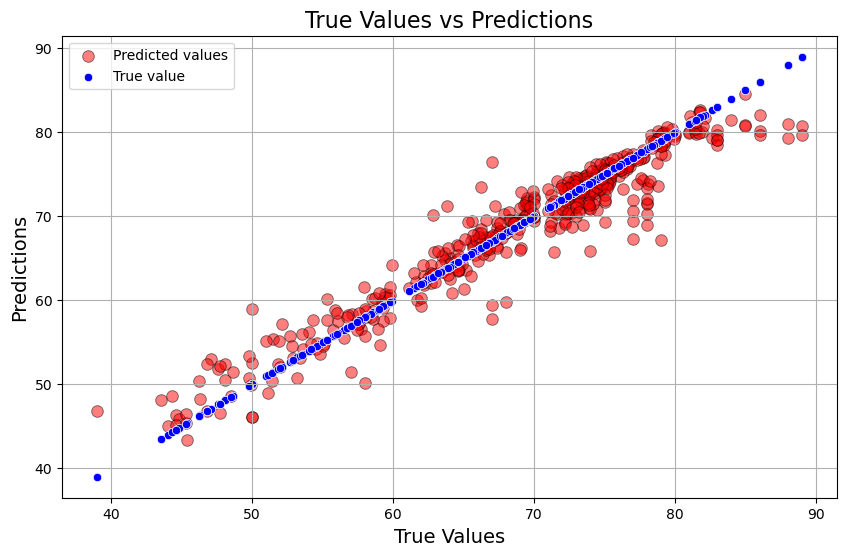

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=ykerrbfsvr_predicted, color='red', alpha=0.5, s=70, edgecolor='k', label='Predicted values')
sns.scatterplot(x=y_test, y=y_test, color='blue', label='True value')
plt.xlabel("True Values", fontsize=14)
plt.ylabel("Predictions", fontsize=14)
plt.title("True Values vs Predictions", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
